# Dow Jones Industrial Average (DJIA) Prediction
## 1. Given: data from Aug 1, 2016 to Nov 30, 2017 with DJIA, 30 Companies price & social media likes
    12 months Date(T), Company Name, Stock Price, Facebook likes, Facebook disklikes, twitter likes, DJIA
    Facebook likes = ('haha')+('like')+('love')+('wow');
    Facebook bads = ('sad')+('angry');
## Task:
###    Given data from Aug 1, 2016 to Nov 30, 2017
###    Split data to
    1. Training set from Aug 1, 2016 to Jul 31, 2017
    2. Validation set from Aug 1, 2017 to Sep 17, 2017
    
## 2. To Predict T+1 and T+30 of DJIA  in next 1 months (Sep 18, 2017 to Oct 18, 2017).
    
## Data Sources:
### a. Facebook Likes, Dislike
### b. Twitter Likes
### c. Yahoo Finance 30 companies stock price + DJIA

for 30 companies
format=>No. company: facebook id
1. 3M: 3m
2. American Express: AmericanExpressUS
3. Apple: AppleInc.HD
4. Boeing: Boeing
5. Caterpillar: caterpillar
6. Chevron: Chevron
7. Cisco Systems: Cisco
8. Coca-Cola: CocaColaUnitedStates
9. DowDuPont: dupontco
10. ExxonMobil: ExxonMobil
11. General Electric: GE
12. Goldman Sachs:goldmansachs
13. IBM: ibm
14. Intel: Intel
15. Johnson & Johnson: jnj
16. JPMorgan Chase: jpmorganchase
17. McDonald's: McDonaldsUS
18. Merck: MerckInvents
19. Microsoft: Microsoft
20. Nike: Nike, nikesportswear
21. Pfizer: Pfizer
22. Procter & Gamble: proctergamble
23. The Home Depot: homedepot
24. Travelers: travelers
25. United Technologies: unitedtechnologiescorp
26. UnitedHealth Group: unitedhealthgroup
27. Verizon: Verizon
28. Visa: VisaUnitedStates
29. Walmart: Walmart
30. Walt Disney: Disney

Query target string: 3m, AmericanExpressUS, AppleInc.HD, Boeing, caterpillar, Chevron, Cisco, CocaColaUnitedStates, dupontco, ExxonMobil, GE, goldmansachs, ibm, Intel, jnj, jpmorganchase, McDonaldsUS, MerckInvents, Microsoft, Nike, nikesportswear, Pfizer, proctergamble, homedepot, travelers, unitedtechnologiescorp, unitedhealthgroup, Verizon, VisaUnitedStates, Walmart, Disney


In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Read training and test data

In [5]:
dataset = pd.read_csv('integrated_data.csv', encoding = "utf-8", parse_dates=["date"],
date_parser=lambda x: pd.to_datetime(x, format="%Y%m%d %H:%M:%S"))
# convert date to int
dataset['date']=dataset['date'].dt.strftime('%Y%m%d')
dataset.set_index(['date', 'company'], inplace=True)
dataset = dataset.sort_index()

In [6]:
?dataset.head(5)

## 3. Select the features for the model.
### stock open, close, high, low price, trade volumne, facebook likes, facebook dislike, twitte likes

In [7]:
# Features selection
X = dataset.loc[:, ['open','high','low', 'close','volume', 'fblikes', 'fbdislikes','twittelikes']]

# Get DJIA close index price
djia = dataset.loc[(dataset.index.get_level_values('company') == 'DJIA')]
djia = djia.loc[:,['close']]

X.head(5)    

open        high         low       close  \
date     company                                                            
20160801 3M                177.080002  178.539993  177.080002  178.289993   
         American Express   64.489998   64.739998   63.959999   64.129997   
         Apple             104.410004  106.150002  104.410004  106.050003   
         Boeing            133.210007  134.229996  132.699997  133.210007   
         Caterpillar        82.760002   82.879997   81.529999   81.949997   

                             volume  fblikes  fbdislikes  twittelikes  
date     company                                                       
20160801 3M                 1598400      246           0          186  
         American Express   2913900      115           0            0  
         Apple             38167900        0           0            0  
         Boeing             3067300        0           0          105  
         Caterpillar        3377100      208           2           29

In [8]:
djia.head(5)

,,close
date,company,
20160801,DJIA,18404.50977
20160802,DJIA,18313.76953
20160803,DJIA,18355.00000
20160804,DJIA,18352.05078
20160805,DJIA,18543.52930


## 4. Prepare T+1 and T+30 DJIA data

In [9]:
# get y value for close(T+1) and close(T+30)
_tmp = djia
djia['T+1'] = _tmp['close'].shift(-1)
djia['T+30'] = _tmp['close'].shift(-30)
djia.head(5)   

,,close,T+1,T+30
date,company,,,
20160801,DJIA,18404.50977,18313.76953,18066.75000
20160802,DJIA,18313.76953,18355.00000,18034.76953
20160803,DJIA,18355.00000,18352.05078,18212.48047
20160804,DJIA,18352.05078,18543.52930,18123.80078
20160805,DJIA,18543.52930,18529.28906,18120.16992


In [10]:
# shift training data 30 day with 30 stocks + 1 DJIA
# Get Total data set from Aug 1, 2016 to Oct 18, 2017
total_row = len(X)
data_range = total_row -(30*31)
_tmpX = X.head(data_range)
_tmpX.head(5)
_tmpX.tail(5)
X = _tmpX

In [11]:
# drop NaN rows.
djia = djia.dropna()
# X = X.dropna()
#djia.tail(5)
# X.tail(5)

## 5. Transform the T+1 and T+30 DJIA from index to 1(growth) or 0 (not growth) 

In [12]:

# Calculate the trend on T+1 and T+30
y = []

for index, row in djia.iterrows():
    _tmp = []
    if (row['T+1']-row['close'] > 0):
        _tmp.append('1')
    else:
        _tmp.append('0')
    if (row['T+30']-row['close'] > 0):
        _tmp.append('1')
    else:
        _tmp.append('0')   
    y.append(_tmp)
    
#djia.head(5)
y[0:10]

[['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0']]

## Remove Company name from dataset

In [13]:
from sklearn.model_selection import train_test_split

x = X.reset_index()
x = x.as_matrix()
x = np.delete(x, np.s_[1:2], axis=1) #Remove company
x.shape

(9548, 9)

## 6. Standardization¶

In [14]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler(feature_range=(0,1)) # default (0, 1) for sigmoid function
mmc.fit(x)
x_std = mmc.transform(x)
x_std

array([[  0.00000000e+00,   6.68093396e-03,   6.71494901e-03, ...,
          1.48420767e-03,   0.00000000e+00,   3.11782356e-03],
       [  0.00000000e+00,   1.79932989e-03,   1.79914844e-03, ...,
          6.93836918e-04,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   3.53015551e-03,   3.58792990e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.00000000e+00,   3.66933256e-03,   3.66784397e-03, ...,
          0.00000000e+00,   0.00000000e+00,   8.04599628e-04],
       [  1.00000000e+00,   2.73845024e-03,   2.73349638e-03, ...,
          0.00000000e+00,   0.00000000e+00,   1.57567427e-03],
       [  1.00000000e+00,   3.26784342e-03,   3.25704191e-03, ...,
          1.15267429e-01,   1.33502861e-02,   0.00000000e+00]])

## 7. Reshape Data to 3D (time, companies+DJIA, and 9 features) after Standarlization
### Split data to training set (92.8%) and testing set (7.2%)

In [15]:
# Reshape data to time slot, company+djia + 9 features
data = x_std.reshape(308, 31, 9)
data
y = np.array(y)

# # data.shape
_X_train, X_test_std, _y_train, y_test = train_test_split(data, y, test_size = 0.072, shuffle = False, stratify = None)


### Split traing set to training data(88.5% of training set) and validation data(11.5% of training set)

In [16]:
from sklearn.model_selection import train_test_split
# Create training and validation sets
X_train_std, X_validate_std, y_train, y_validate = train_test_split(_X_train, _y_train, test_size = 0.115, shuffle = False, stratify = None)
# X_validate_std[1]

In [17]:
X_train_std.shape

(252, 31, 9)

## 8. Build model: 3 Layers (128-64-32) LSTM for this prediction


### LSTM Model

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, TimeDistributed, LSTM, GRU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

def create_LSTM_model(optimizer='adam', kernel_init='normal', recurrent_init='normal', bias_init='zero', batch_size=1):
    model = Sequential()
    #input method: batch_input_shape=(batch, timesteps/lags, features)
    #  or input_shape=(timesteps/lags, features) , model.fit(X, y, epochs=n, batch_size=b, verbose=2)
    model.add(LSTM(128, batch_input_shape=(batch_size, 31, 9), return_sequences=True, activation='sigmoid', recurrent_activation='hard_sigmoid', use_bias=True, 
                   kernel_initializer=kernel_init, recurrent_initializer=recurrent_init, bias_initializer=bias_init,
                   unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, 
                   activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
                   dropout=0.0, recurrent_dropout=0.0, implementation=1, return_state=False, 
                   go_backwards=False, stateful=False, unroll=False))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True, activation='sigmoid', recurrent_activation='hard_sigmoid', use_bias=True, 
                   kernel_initializer=kernel_init, recurrent_initializer=recurrent_init, bias_initializer=bias_init, unit_forget_bias=True, 
                   kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                   kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                   implementation=1, return_state=False, go_backwards=False, stateful=False, unroll=False))
    model.add(Dropout(0.2))
    # The last layer of LSTM, return_sequences = False
    model.add(LSTM(32, return_state=False, activation='sigmoid', recurrent_activation='hard_sigmoid', use_bias=True, 
                   kernel_initializer=kernel_init, recurrent_initializer=recurrent_init, bias_initializer=bias_init, unit_forget_bias=True, 
                   kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                   kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                   implementation=1, return_sequences=False, go_backwards=False, stateful=False, unroll=False))
    model.add(Dropout(0.2))    
    model.add(Dense(2, activation='sigmoid', kernel_initializer=kernel_init))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [19]:
X_3D_train_std = X_train_std
X_3D_train_std.shape

(252, 31, 9)

## Train the model

In [44]:
# Parameters
from keras.optimizers import Adam
# adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) #default
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
optimizers = adam
kernel_init = 'glorot_uniform'
recurrent_init = 'glorot_uniform'
bias_init ='zero'
epochs = 20
batches = 1

model_LSTM = create_LSTM_model(optimizer=optimizers, batch_size=batches, kernel_init=kernel_init, 
                 recurrent_init=recurrent_init, bias_init=bias_init)
model_LSTM.fit(X_3D_train_std, y_train,
          epochs=epochs,
          batch_size=batches,
          shuffle=False,
          validation_data=(X_validate_std, y_validate),
          callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, mode='auto'),
          ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001, verbose=1, mode='auto')])

Train on 252 samples, validate on 33 samples
Epoch 1/20
252/252 [==============================] - 13s - loss: 0.6574 - acc: 0.5833 - val_loss: 0.4570 - val_acc: 0.8485
Epoch 2/20
252/252 [==============================] - 11s - loss: 0.6088 - acc: 0.6528 - val_loss: 0.4122 - val_acc: 0.8485
Epoch 3/20
252/252 [==============================] - 12s - loss: 0.6163 - acc: 0.6508 - val_loss: 0.4120 - val_acc: 0.8485
Epoch 4/20
252/252 [==============================] - 11s - loss: 0.6192 - acc: 0.6528 - val_loss: 0.4130 - val_acc: 0.8485
Epoch 5/20
251/252 [============================>.] - ETA: 0s - loss: 0.6238 - acc: 0.6494
Epoch 00004: reducing learning rate to 0.00020000000949949026.
252/252 [==============================] - 13s - loss: 0.6227 - acc: 0.6508 - val_loss: 0.4165 - val_acc: 0.8485
Epoch 6/20
251/252 [============================>.] - ETA: 0s - loss: 0.6151 - acc: 0.6614
Epoch 00005: reducing learning rate to 0.0001.
252/252 [==============================] - 13s - loss:

### Save the model

In [48]:
import datetime
model_filename = 'social-lstm_trained_model'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'.h5'
model_LSTM.save(model_filename)

### Load previous trained model if required.

In [49]:
from keras.models import load_model
model_LSTM = load_model('social-lstm_trained_model.h5')

## 9. Test on Testing Set

In [50]:
batches = 1
y_result = model_LSTM.predict(X_test_std, batch_size=batches)

## 10. Results: 
### The Probability of djia increase in next day is around 52%, Pr. of next 30 days increase is 85%

In [51]:
y_result

array([[ 0.5147661 ,  0.84850389],
       [ 0.51476365,  0.8485049 ],
       [ 0.51476359,  0.84850371],
       [ 0.51476401,  0.84850472],
       [ 0.51476401,  0.84850454],
       [ 0.51476395,  0.84850472],
       [ 0.51476467,  0.84850436],
       [ 0.51476586,  0.84850407],
       [ 0.51476383,  0.84850454],
       [ 0.51476443,  0.84850407],
       [ 0.51476437,  0.84850436],
       [ 0.51476467,  0.84850436],
       [ 0.51476449,  0.8485043 ],
       [ 0.51476455,  0.84850436],
       [ 0.51476383,  0.84850353],
       [ 0.51476449,  0.8485043 ],
       [ 0.51476729,  0.84850514],
       [ 0.51476479,  0.84850454],
       [ 0.5147649 ,  0.84850436],
       [ 0.51476449,  0.84850436],
       [ 0.5147664 ,  0.84850454],
       [ 0.51476997,  0.84850311],
       [ 0.51476544,  0.84850413]], dtype=float32)

## 11. Actual Trend of T+1, T+30 of each day

In [52]:
y_test

array([['1', '1'],
       ['1', '1'],
       ['0', '1'],
       ['0', '1'],
       ['0', '1'],
       ['0', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['0', '1'],
       ['0', '1'],
       ['1', '1'],
       ['1', '1'],
       ['0', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1']], 
      dtype='<U1')

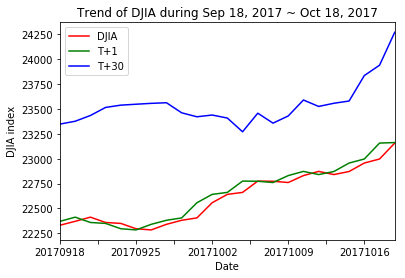

In [53]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plb
df = djia.tail(23)
_df = df.reset_index(level=1, drop=True) #Remove company information
_df['close'].plot(color='r',label='DJIA')
_df['T+1'].plot(color='g',label='T+1')
_df['T+30'].plot(color='b',label='T+30')
plt.title('Trend of DJIA during Sep 18, 2017 ~ Oct 18, 2017')
plt.xlabel('Date')
plt.ylabel('DJIA index')
plt.legend(['DJIA', 'T+1', 'T+30'])
plt.show()

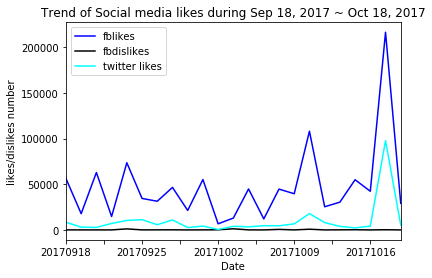

In [54]:
df = X.reset_index(level=1, drop=True) # Remove company information
df = df.groupby(['date']).sum()
social_df = df.tail(23) # Get last 23 days

social_df['fblikes'].plot(color='blue', label='fblikes')
social_df['fbdislikes'].plot(color='black', label='fbdislikes')
social_df['twittelikes'].plot(color='cyan', label='twitter likes')
plt.title('Trend of Social media likes during Sep 18, 2017 ~ Oct 18, 2017')
plt.xlabel('Date')
plt.ylabel('likes/dislikes number')
plt.legend(['fblikes', 'fbdislikes', 'twitter likes'])
plt.show()

In [55]:
from sklearn import metrics
threshold = 0.5
y_result = np.where(y_result >= threshold, 1, 0)

t1r = list(map(int,y_result[:,0]))
t30r = list(map(int,y_result[:,1]))
t1t = list(map(int,y_test[:,0]))
t30t = list(map(int,y_test[:,1]))

print('T+1 report\n %s'%(metrics.classification_report(t1t, t1r))) # True value, predict results
print('T+30 report\n %s'%(metrics.classification_report(t30t, t30r)))

T+1 report
              precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.70      1.00      0.82        16

avg / total       0.48      0.70      0.57        23

T+30 report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        23

avg / total       1.00      1.00      1.00        23



Confusion matrix, without normalization
[[ 0  7]
 [ 0 16]]


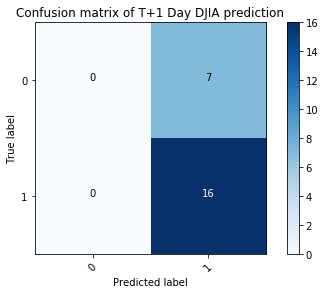

In [56]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



class_names = ['0','1']
# Compute confusion matrix
cnf_matrix = confusion_matrix(t1t, t1r)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix of T+1 Day DJIA prediction')

plt.show()